In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Conv1D,MaxPooling1D,Add,GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
train_path='./train.csv'
test_path='./test.csv'

In [18]:
tf.__version__

'2.3.0'

In [19]:
df=pd.read_csv(train_path)
df=df.dropna()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [20]:
X=df.drop('label',axis=1)
Y=df['label']

In [21]:
vocab_size=1000

In [22]:
mesg=X.copy()

In [23]:
mesg.reset_index(inplace=True)

In [24]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(mesg)):
  #print(i)
  review=re.sub('[^a-zA-Z]',' ',mesg['title'][i])
  reiew=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [26]:
onehot_representation=[one_hot(words,vocab_size) for words in corpus]

In [27]:
onehot_representation

[[334, 482, 28, 984, 341, 656, 601, 895, 478, 518, 426, 265, 673, 170],
 [100, 345, 616, 658, 61, 788, 191],
 [361, 486, 669, 510, 229, 629],
 [228, 204, 725, 473, 890, 529, 427, 538, 619],
 [233, 61, 820, 863, 335, 965, 61, 88, 343, 21],
 [33, 313, 28, 440, 574, 444, 831, 409, 897, 99, 325, 580, 300, 515, 278, 191],
 [43, 758, 969, 355, 711, 710, 580, 671, 790, 215, 852, 197],
 [561, 554, 38, 747, 438, 116, 800, 444, 922, 790, 215, 852, 197],
 [74, 38, 746, 343, 957, 824, 412, 784, 444, 35],
 [468, 285, 196, 999, 732, 15, 946, 708],
 [900, 260, 998, 287, 351, 806, 985, 877, 791, 124, 538],
 [890, 528, 601, 972, 824, 72, 444, 116],
 [674, 216, 695, 965, 776, 940, 669, 397, 47, 393, 267, 333, 64, 860],
 [725, 902, 140, 963, 947, 910, 702, 760, 790, 215, 852, 197],
 [734, 982, 128, 875, 502, 416, 790, 215, 852, 197],
 [661, 222, 646, 575, 76, 773, 953, 673, 387, 790, 458, 615, 193],
 [453, 801, 725, 397, 345],
 [379, 933, 756, 742, 741, 444, 837, 634, 191],
 [244, 249, 616, 26, 752, 243,

In [28]:
sent_length=1000
embedded_docs=pad_sequences(onehot_representation,padding='pre',maxlen=sent_length)
print(embedded_docs.shape)

(18285, 1000)


In [29]:
embedded_docs

array([[  0,   0,   0, ..., 265, 673, 170],
       [  0,   0,   0, ...,  61, 788, 191],
       [  0,   0,   0, ..., 510, 229, 629],
       ...,
       [  0,   0,   0, ..., 215, 852, 197],
       [  0,   0,   0, ..., 741, 725, 753],
       [  0,   0,   0, ..., 506, 609, 358]])

In [30]:
def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg

In [31]:
X_train,X_test = embedded_docs[0:1000],embedded_docs[1000:1200]

In [32]:
# Y_train,Y_test = [np.array([1.0,0.0]) if x == 1 else np.array([0.0,1.0]) for x in Y[0:1000]],[[1.0,0.0] if x == 1 else [0.0,1.0] for x in Y[1000:1200]] 
Y_train,Y_test = [[1.0,0.0] if x == 1 else [0.0,1.0] for x in Y[0:1000]],[[1.0,0.0] if x == 1 else [0.0,1.0] for x in Y[1000:1200]] 

In [33]:
X_train = my_func(X_train)
X_test = my_func(X_test)
Y_train = my_func(Y_train)
Y_test = my_func(Y_test)


In [34]:
X_train.shape

TensorShape([1000, 1000])

In [64]:

def interseptionNetwork(input_embedding):
    x1f = layers.Conv1D(64, 1, activation="relu", padding = "same")(input_embeddings)
    x2f = layers.Conv1D(64, 2, activation="relu", padding = "same")(input_embeddings)
    x3f = layers.Conv1D(64, 3, activation="relu", padding = "same")(input_embeddings)
    x4f = layers.Conv1D(64, 4, activation="relu", padding = "same")(input_embeddings)
    x5f =  layers.Conv1D(64, 5, activation="relu", padding = "same")(input_embeddings)
    
    y = layers.concatenate([x1f,x2f,x3f,x4f,x5f])
    
    return y

def genrateCNNnetwork(input_embedding):
    x = layers.Conv1D(64, 3, activation="relu")(input_embeddings)
    x = layers.Conv1D(32, 3, activation="relu")(x)
    x = layers.MaxPooling1D(3)(x)
    x = layers.Conv1D(32, 3, activation="relu")(x)
    x = layers.Conv1D(16, 3, activation="relu")(x)
    x = layers.GlobalMaxPooling1D()(x)
    return x


def resNet(input_embedding):
    x = layers.Conv1D(32, 3, activation="relu")(input_embedding)
    x = layers.Conv1D(64, 3, activation="relu")(x)
    block_1_output = layers.MaxPooling1D(3)(x)

    x = layers.Conv1D(64, 3, activation="relu", padding="same")(block_1_output)
    x = layers.Conv1D(64, 3, activation="relu", padding="same")(x)
    block_2_output = layers.add([x, block_1_output])

    x = layers.Conv1D(64, 3, activation="relu", padding="same")(block_2_output)
    x = layers.Conv1D(64, 3, activation="relu", padding="same")(x)
    block_3_output = layers.add([x, block_2_output])

    x = layers.Conv1D(64, 3, activation="relu")(block_3_output)
    x = layers.GlobalAveragePooling1D()(x)
    return x
def genrateLSTMnetwork(input_embedding):
    x = layers.Bidirectional(layers.LSTM(32))(input_embedding)
    return x

## Mini Resnet

In [65]:
num_words = 1000  # Size of vocabulary obtained when preprocessing text data
num_departments = 2  # Number of departments for predictions

input_layer = keras.Input(shape=(None,),name="Input_Sentence")
input_embeddings = layers.Embedding(num_words,64)(input_layer)
x = genrateLSTMnetwork(input_embeddings)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(2)(x)
model = keras.Model(input_layer, outputs, name="toy_resnet")
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "toy_resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Sentence (InputLayer)  [(None, None)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 34        
Total params: 89,906
Trainable params: 89,906
Non-trainable params: 0
_________________________________________________________________


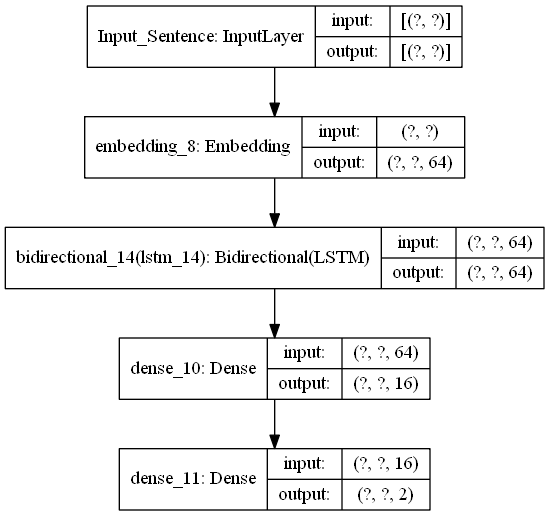

In [44]:
keras.utils.plot_model(model,show_shapes= True,to_file="model.png")

In [78]:
filepath="./rahul/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

Path('./rahul').mkdir(parents=True, exist_ok=True)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,callbacks=callbacks_list)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9990
Epoch 00001: val_accuracy improved from -inf to 0.88000, saving model to ./rahul\weights-improvement-01-0.88.hdf5
32/32 [==============================] - 43s 1s/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 1.0594 - val_accuracy: 0.8800
Epoch 2/10
 8/32 [======>.......................] - ETA: 30s - loss: 0.0050 - accuracy: 1.0000

KeyboardInterrupt: 

In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.339330,0.995,3.518561,0.81
1,3.339326,0.996,3.518104,0.81
2,3.339326,0.996,3.518088,0.81
3,3.339325,0.996,3.518088,0.81
4,3.339325,0.996,3.518088,0.81
5,3.339325,0.996,3.518088,0.81
6,3.339325,0.996,3.518088,0.81
7,3.339325,0.996,3.518088,0.81
8,3.339326,0.996,3.518088,0.81
9,3.339325,0.996,3.518088,0.81


In [ ]:
temp = model.predict(X_train[0])

In [ ]:
temp.shape

In [ ]:
num_words = 1000  # Size of vocabulary obtained when preprocessing text data
num_departments = 2  # Number of departments for predictions

input = keras.Input(shape=(None,),name="Input_Sentence")
input_embeddings = layers.Embedding(num_words,64)(input)

output_LSTM = layers.LSTM(128)(input_embeddings)

x = layers.Conv1D(64, 3, activation="relu")(input_embeddings)
x = layers.Conv1D(32, 3, activation="relu")(x)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(32, 3, activation="relu")(x)
x = layers.Conv1D(16, 3, activation="relu")(x)
cnn_output = layers.GlobalMaxPooling1D()(x)

x = layers.concatenate([output_LSTM,cnn_output])

pred = layers.Dense(num_departments,activation='softmax',name="Department")(x)

model = keras.Model(input,pred,name="test_model")
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
# model.fit([[1 for i in range(100)],[1 for i in range(100)]],[[1,0],[0,1]],validation_data=([[1 for i in range(100)]],[[1,0]]),epochs=10,batch_size=1)
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=15)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
model.save()


In [ ]:
keras.utils.plot_model(model,show_shapes= True,to_file="model.png")